The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student. The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

In [56]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
#import the data 
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

we can see all of them are datatype - object except CGPA

In [4]:
# Checking the Types of columns
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [5]:
#Checking the Null values
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

There are so many null values are present. for a categorical data the null values can be filled with the mode of that column

In [6]:
for i in df.columns:
    df[i]=df[i].fillna(df[i].mode()[0])
df 

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [7]:
#Checking again for the Null values
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

now its been treated 

now lets rename 2 columns which are HS-105/12 and HS-205/20

In [8]:
df.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [9]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105',
       'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222',
       'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217',
       'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302',
       'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317',
       'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412',
       'CGPA'],
      dtype='object')

In [10]:
df.describe()

,CGPA
count,571.000000
mean,2.954888
std,0.620552
min,0.800000
25%,2.538000
50%,3.029000
75%,3.451000
max,3.985000


Seat no's has to be unique as each student will have one seat. So lets find the unique of other columns....

Also since Seat no doesnot seem like a strong predictor of cgpa we drop it

In [11]:
df.drop(['Seat No.'],axis='columns',inplace=True)

In [12]:
df['PH-121'].unique()

array(['B-', 'A', 'D', 'A-', 'B+', 'B', 'C+', 'C', 'C-', 'D+', 'WU', 'A+',
       'F'], dtype=object)

as there are many columns lets use for loop to find unique values of each column

In [13]:
for i in df.columns:
    print(df[i].unique())

['B-' 'A' 'D' 'A-' 'B+' 'B' 'C+' 'C' 'C-' 'D+' 'WU' 'A+' 'F']
['D+' 'D' 'B' 'C+' 'A-' 'B-' 'C-' 'B+' 'C' 'A' 'A+' 'F']
['C-' 'D+' 'A' 'A-' 'B' 'C+' 'B+' 'B-' 'C' 'D' 'WU' 'A+' 'F']
['C' 'D' 'B-' 'B+' 'D+' 'B' 'C-' 'C+' 'A-' 'A' 'WU' 'A+' 'F']
['C-' 'B-' 'B+' 'D' 'A' 'C+' 'A-' 'C' 'B' 'D+' 'A+' 'F' 'WU']
['D+' 'C' 'A' 'A-' 'B' 'B-' 'B+' 'C+' 'C-' 'A+' 'D']
['D' 'B-' 'D+' 'A-' 'C+' 'A' 'C-' 'C' 'B' 'B+' 'A+' 'F' 'WU']
['C-' 'A' 'B+' 'B' 'A-' 'B-' 'C' 'C+' 'D+' 'D' 'A+' 'WU' 'F']
['B-' 'D+' 'A-' 'D' 'A' 'B+' 'B' 'C-' 'C+' 'C' 'WU' 'A+']
['C-' 'D' 'A-' 'C+' 'B+' 'A' 'D+' 'C' 'B' 'B-' 'WU' 'F' 'A+']
['C-' 'B+' 'B-' 'D' 'C' 'A-' 'C+' 'D+' 'B' 'A' 'A+' 'I' 'WU' 'F']
['B+' 'C+' 'A-' 'B' 'A' 'B-' 'D' 'WU' 'A+' 'C' 'D+' 'C-' 'F']
['D' 'B-' 'A' 'D+' 'C' 'B+' 'A-' 'B' 'C+' 'C-' 'WU' 'F' 'A+' 'W']
['A-' 'C-' 'A' 'B-' 'B+' 'C+' 'D+' 'B' 'C' 'W' 'A+' 'D' 'F']
['B-' 'D+' 'A' 'D' 'A-' 'C-' 'C' 'B+' 'C+' 'B' 'A+' 'WU' 'W' 'F']
['C+' 'D+' 'A' 'C' 'A-' 'B+' 'B-' 'B' 'D' 'A+' 'C-' 'WU' 'W' 'F']
['D+' 'D' '

Here we can see 
The symbol “WU” indicates that an enrolled student did not officially withdraw from the course and also failed to complete course requirements
The symbol “W” indicates that the student was permitted to drop the course
The symbol “I” indicates that a portion of required coursework has not been completed

In [14]:
# Replacing WU (Withdrawal Unauthorized) as F because it that student is on roll course is not completed
for i in df.columns:
    df[i] = df[i].astype(str).str.replace("WU",'F')

In [15]:
# Replacing W (Withdrawal) as F because it that student is on roll course is not completed
for i in df.columns:
    df[i] = df[i].astype(str).str.replace("W",'F')

In [16]:
# Replacing I (Incomplete) as F because it that student is on roll course is not completed
for i in df.columns:
    df[i] = df[i].astype(str).str.replace("I",'F')

EDA

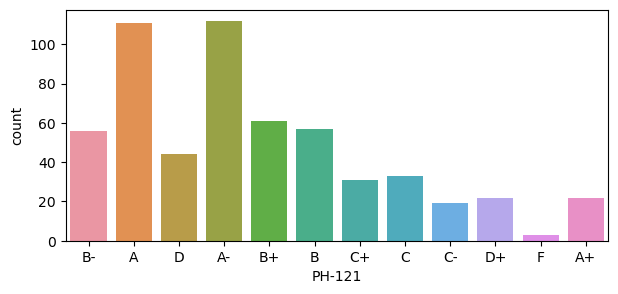

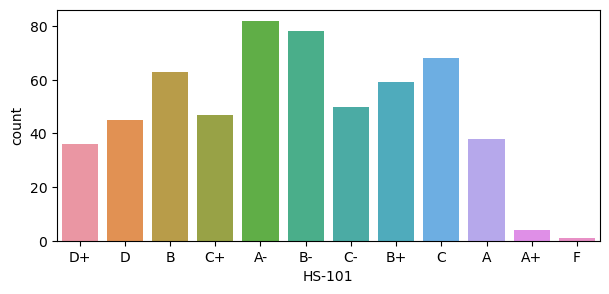

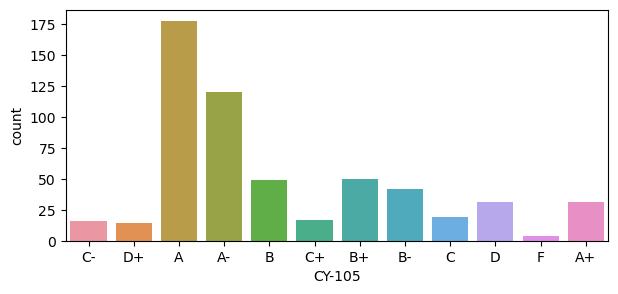

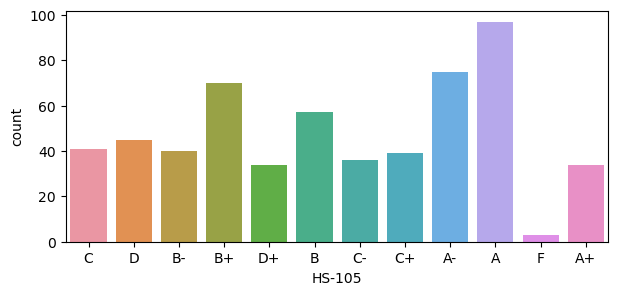

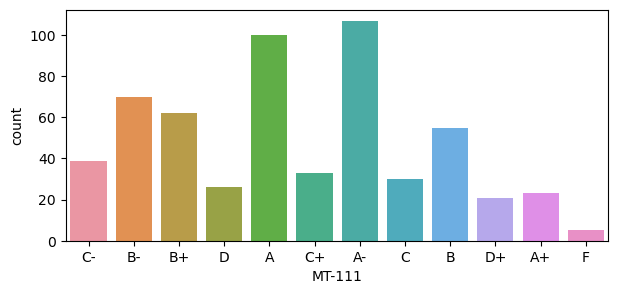

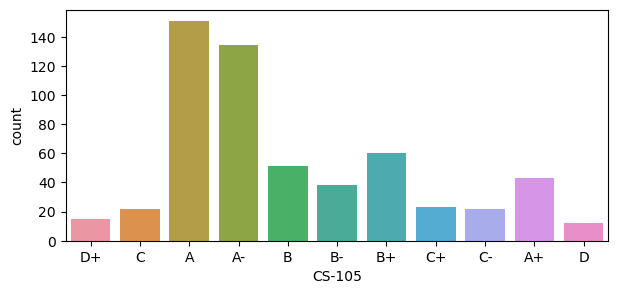

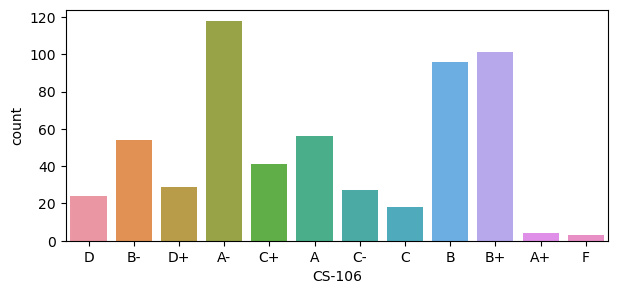

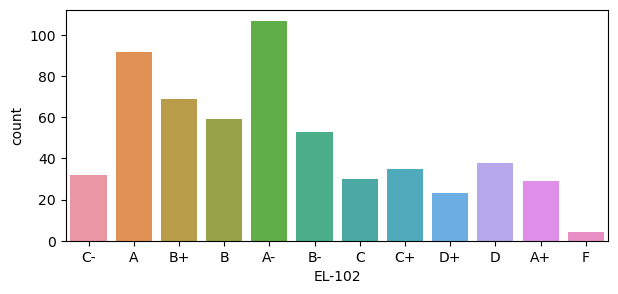

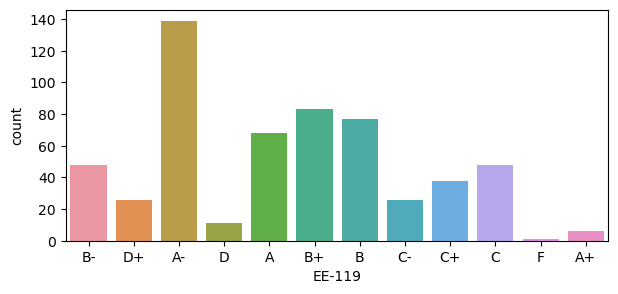

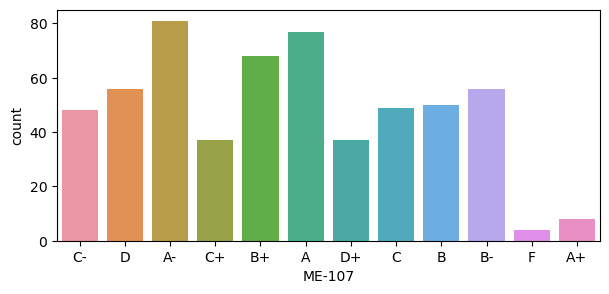

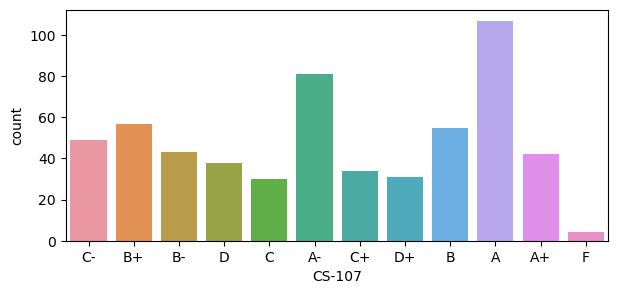

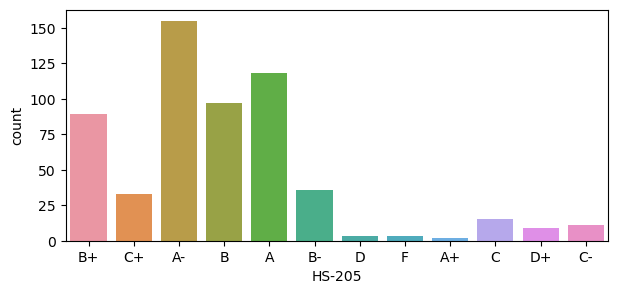

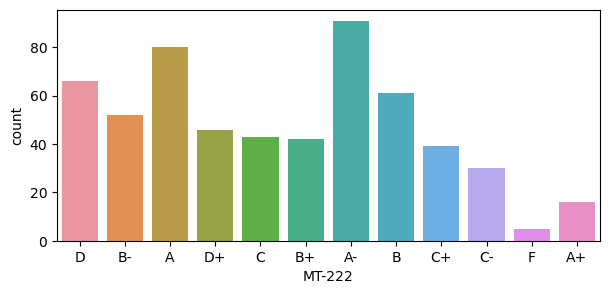

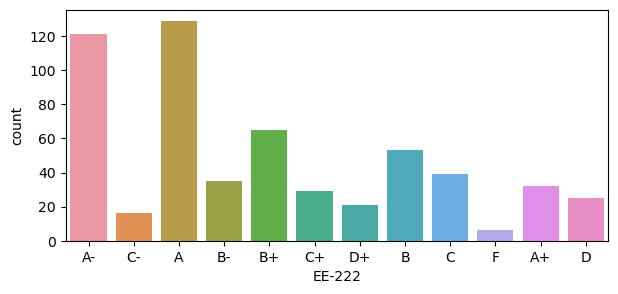

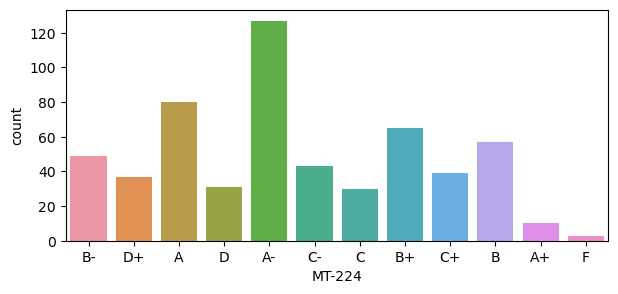

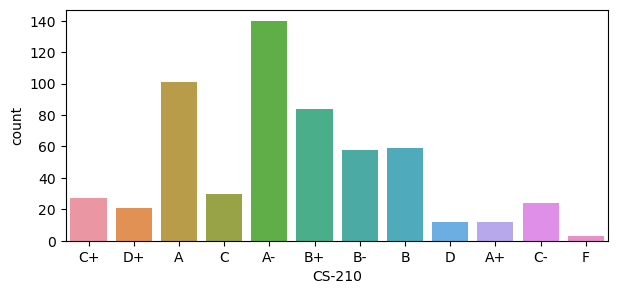

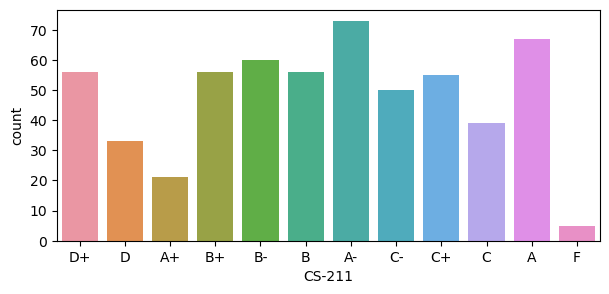

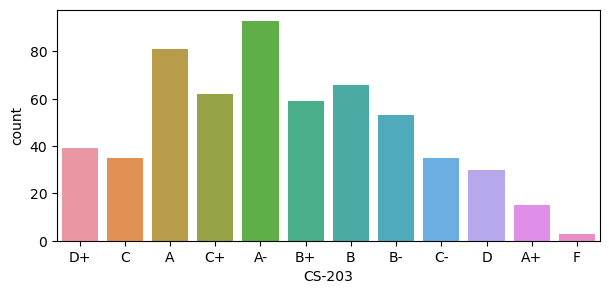

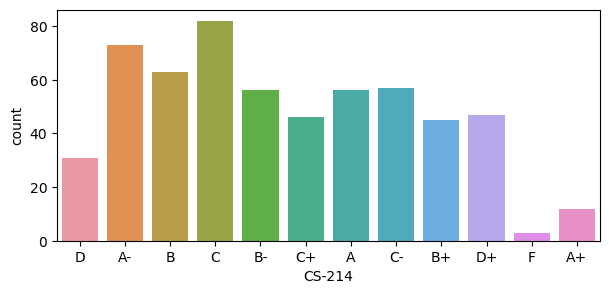

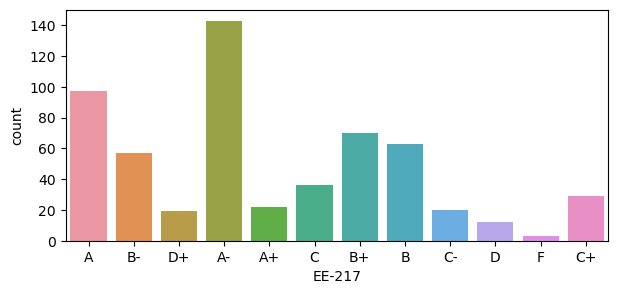

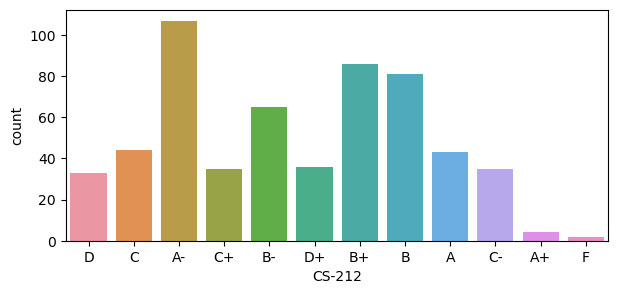

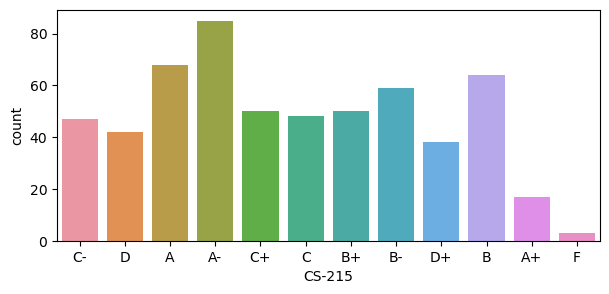

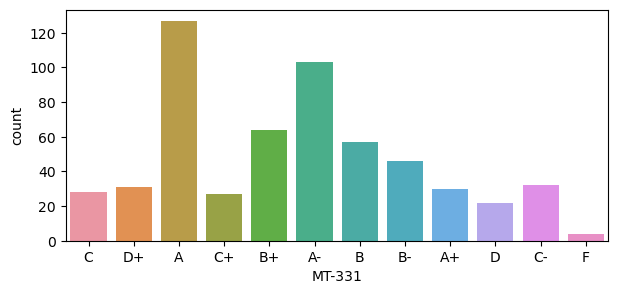

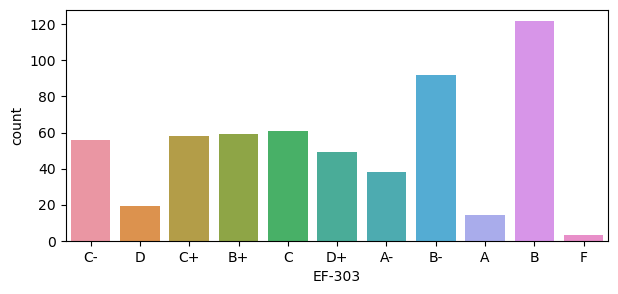

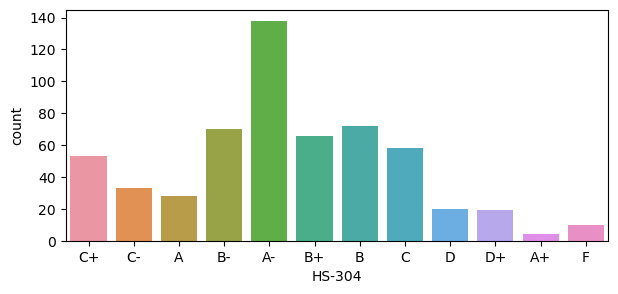

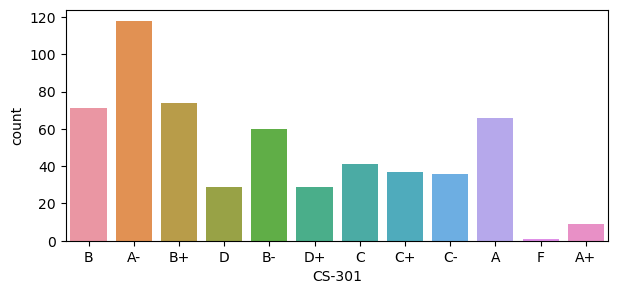

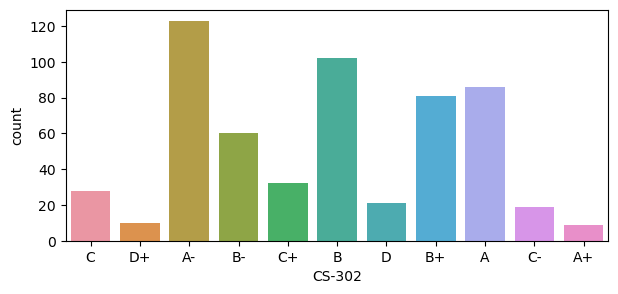

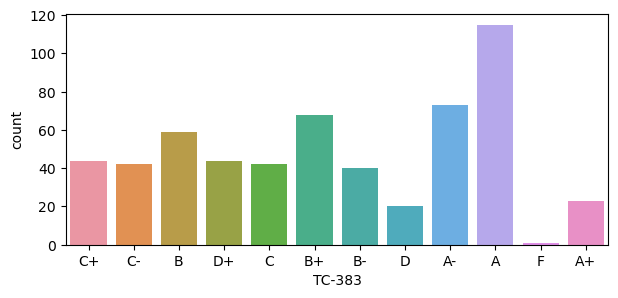

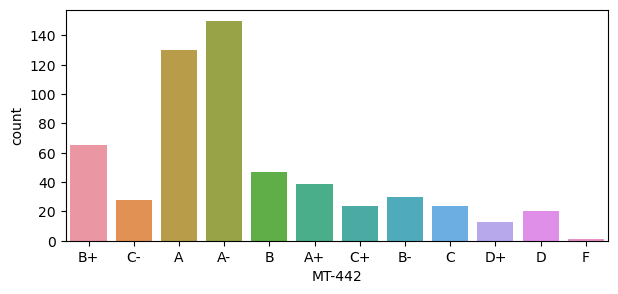

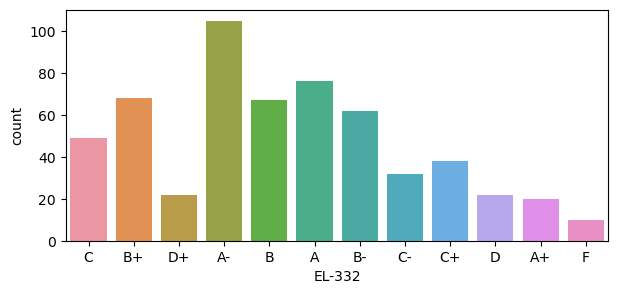

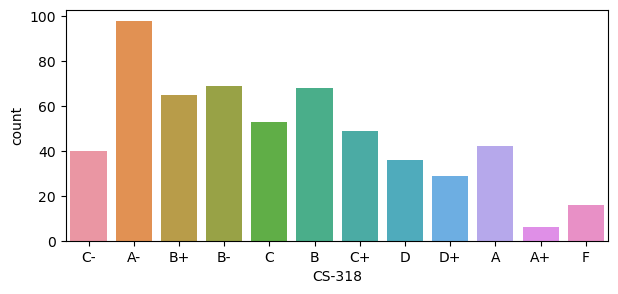

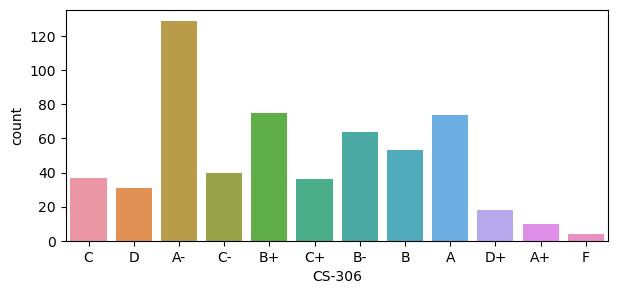

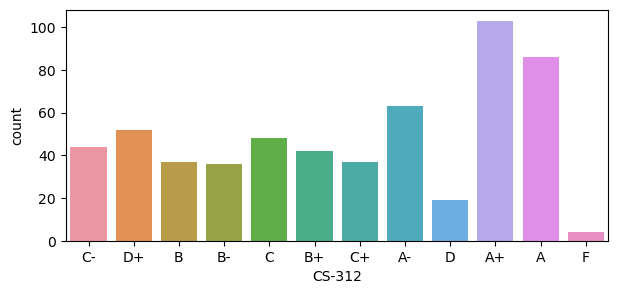

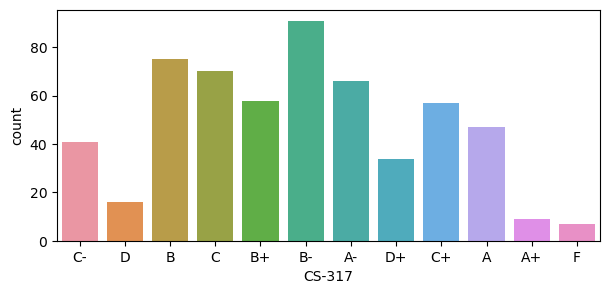

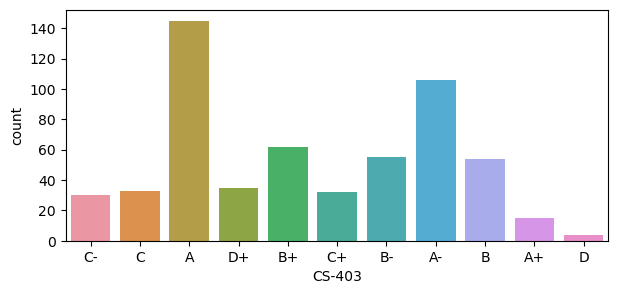

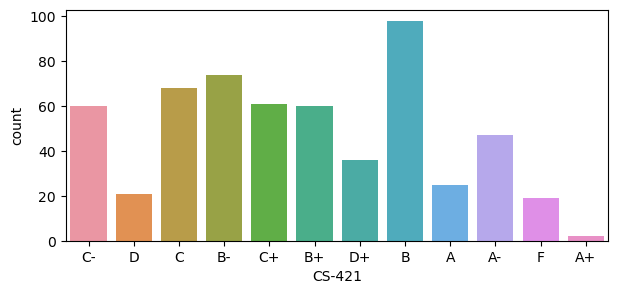

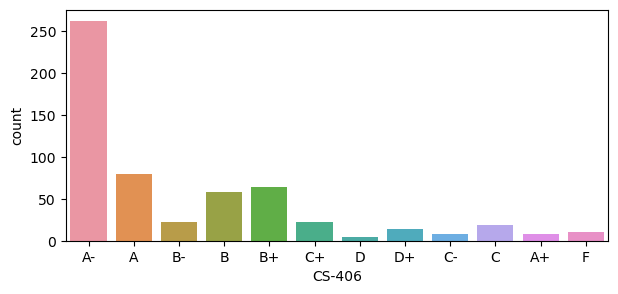

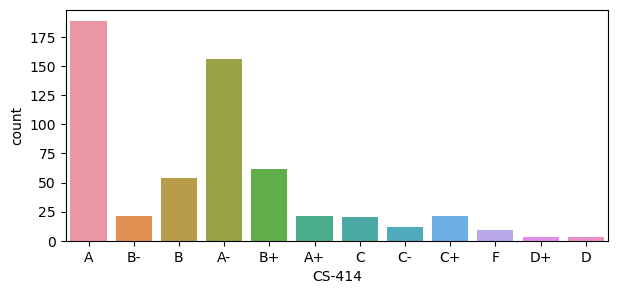

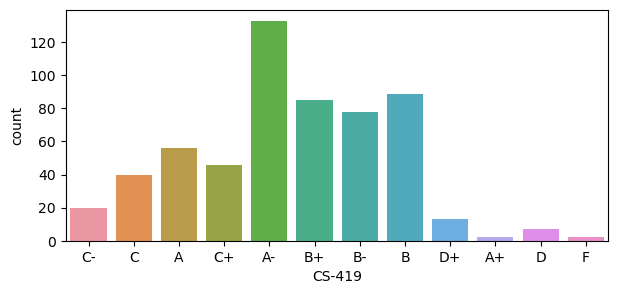

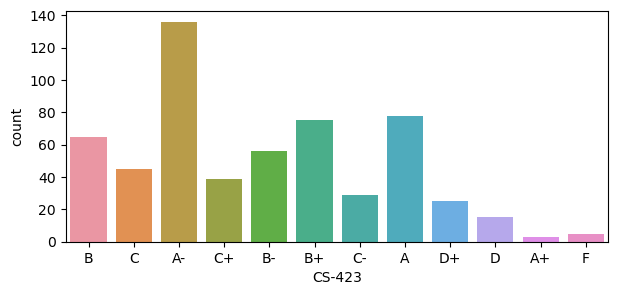

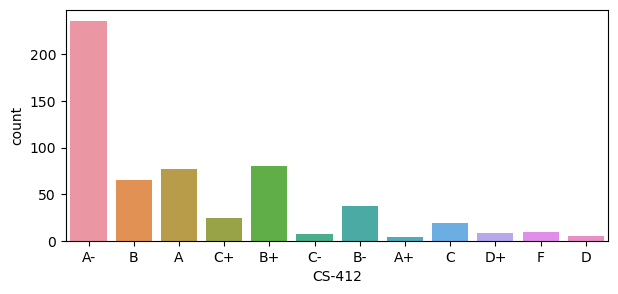

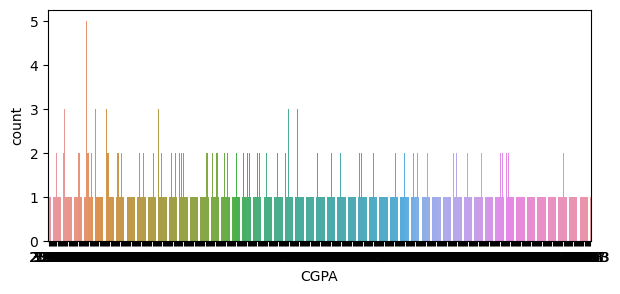

In [17]:
# Plotting count plot for the columns. As there are many columns I am using loop
for i in df.columns:
    plt.figure(figsize=(7,3))
    sns.countplot(x=df[i])

Here in the above plot we can see how many students got what Grade in that particular subjects

Encoding categorical columns using oridinal encoder

In [18]:
oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
        
df

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0,72.0
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0,48.0
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0,409.0
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0,33.0
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0,459.0
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0,457.0
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0,369.0
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0,70.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PH-121  571 non-null    float64
 1   HS-101  571 non-null    float64
 2   CY-105  571 non-null    float64
 3   HS-105  571 non-null    float64
 4   MT-111  571 non-null    float64
 5   CS-105  571 non-null    float64
 6   CS-106  571 non-null    float64
 7   EL-102  571 non-null    float64
 8   EE-119  571 non-null    float64
 9   ME-107  571 non-null    float64
 10  CS-107  571 non-null    float64
 11  HS-205  571 non-null    float64
 12  MT-222  571 non-null    float64
 13  EE-222  571 non-null    float64
 14  MT-224  571 non-null    float64
 15  CS-210  571 non-null    float64
 16  CS-211  571 non-null    float64
 17  CS-203  571 non-null    float64
 18  CS-214  571 non-null    float64
 19  EE-217  571 non-null    float64
 20  CS-212  571 non-null    float64
 21  CS-215  571 non-null    float64
 22  MT

lets see the corelation

In [20]:
df.corr()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
PH-121,1.000000,0.381928,0.557317,0.497479,0.466278,0.609139,0.293264,0.422681,0.579658,0.532375,...,0.040069,0.465313,0.323536,0.293812,0.286681,0.152592,0.465027,0.096012,0.298473,-0.644856
HS-101,0.381928,1.000000,0.335792,0.473158,0.432835,0.400713,0.311754,0.349724,0.309697,0.336376,...,0.214008,0.364250,0.229546,0.302378,0.268525,0.224645,0.284668,0.228103,0.226880,-0.541003
CY-105,0.557317,0.335792,1.000000,0.507067,0.535095,0.579706,0.373015,0.444440,0.469375,0.465505,...,0.266158,0.474481,0.469042,0.355490,0.135091,0.008621,0.433677,0.122768,0.068831,-0.638069
HS-105,0.497479,0.473158,0.507067,1.000000,0.491833,0.482322,0.496170,0.357792,0.400635,0.319609,...,0.266048,0.479945,0.454301,0.420463,0.172566,0.143297,0.467370,0.236389,0.157517,-0.614814
MT-111,0.466278,0.432835,0.535095,0.491833,1.000000,0.392731,0.497187,0.554688,0.409823,0.471212,...,0.472979,0.557496,0.414430,0.516979,0.306674,0.230135,0.506119,0.403731,0.273973,-0.733845
CS-105,0.609139,0.400713,0.579706,0.482322,0.392731,1.000000,0.285812,0.354306,0.507357,0.454212,...,0.060028,0.387639,0.279329,0.238387,0.243644,0.120416,0.306827,0.045134,0.183380,-0.587644
CS-106,0.293264,0.311754,0.373015,0.496170,0.497187,0.285812,1.000000,0.334523,0.270055,0.279971,...,0.455611,0.417943,0.429381,0.400689,0.129966,0.110908,0.424472,0.342061,0.188940,-0.536865
EL-102,0.422681,0.349724,0.444440,0.357792,0.554688,0.354306,0.334523,1.000000,0.450566,0.462630,...,0.304616,0.468480,0.307571,0.372931,0.257660,0.245032,0.382316,0.372005,0.269154,-0.643318
EE-119,0.579658,0.309697,0.469375,0.400635,0.409823,0.507357,0.270055,0.450566,1.000000,0.571973,...,0.156129,0.445496,0.341988,0.361185,0.300777,0.213085,0.465913,0.244615,0.325017,-0.643000
ME-107,0.532375,0.336376,0.465505,0.319609,0.471212,0.454212,0.279971,0.462630,0.571973,1.000000,...,0.201133,0.463607,0.338740,0.349167,0.306146,0.154978,0.442331,0.222292,0.297847,-0.671853


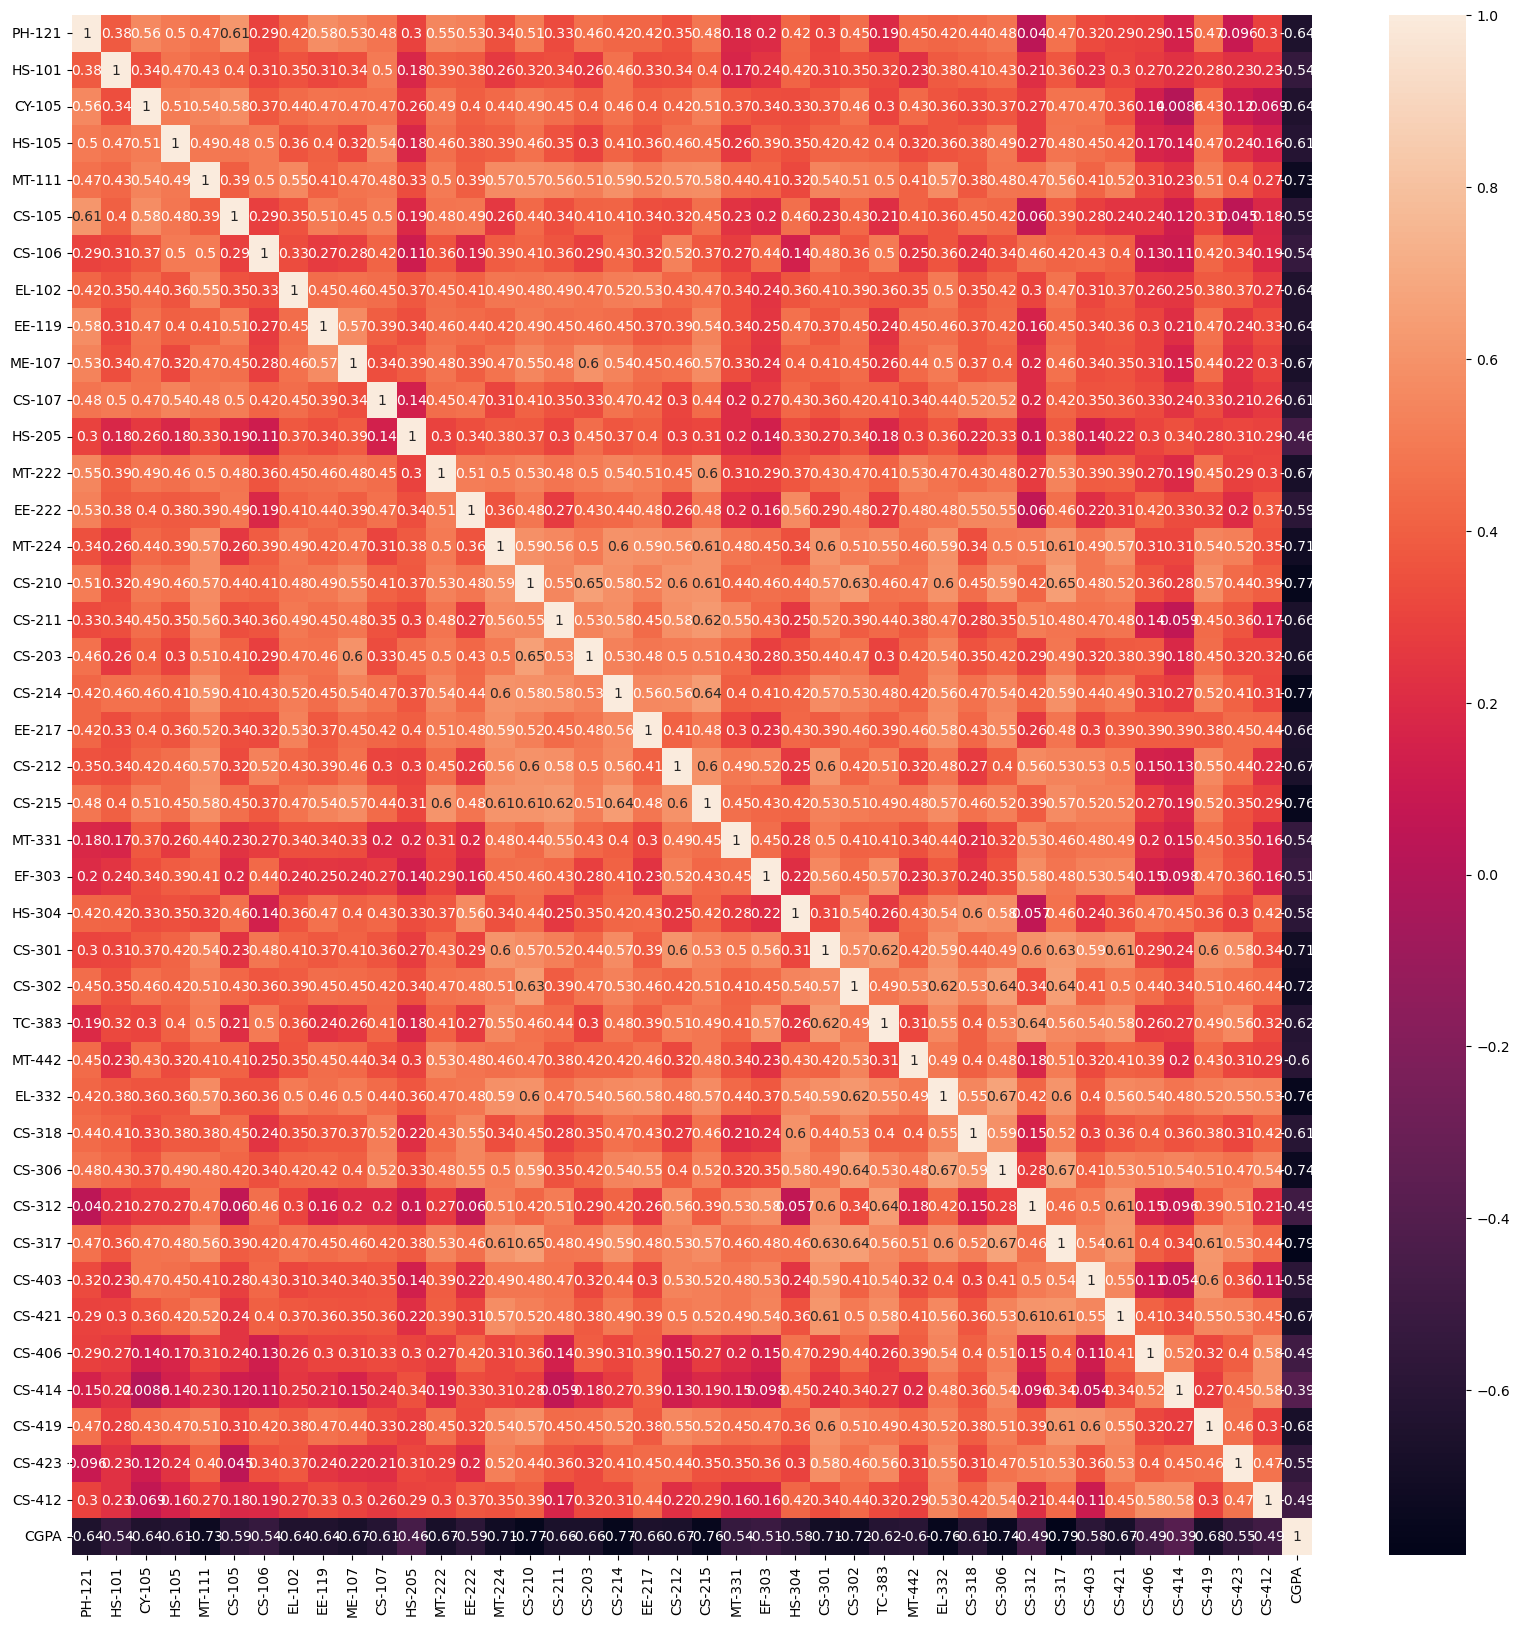

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

let's divide the data into features (X) and labels (y). 

Now lets seperate dependent and independent columns to X and Y

In [22]:
x=df.drop(["CGPA"],axis=1)
y=df["CGPA"]

In [23]:
# Checking for skewness
x.skew().sort_values(ascending=False)

CS-406    1.453702
CS-412    1.277963
CS-414    1.260279
CY-105    0.957141
CS-105    0.930769
HS-205    0.876993
MT-442    0.869952
EE-222    0.743644
EE-217    0.712960
CS-210    0.688006
MT-331    0.627721
CS-106    0.621780
CS-403    0.618339
CS-302    0.601788
EE-119    0.574880
PH-121    0.534939
CS-423    0.526550
CS-419    0.506748
HS-304    0.481398
EL-102    0.480157
MT-111    0.461982
EL-332    0.451388
CS-312    0.426574
CS-306    0.416156
CS-301    0.415084
CS-212    0.414872
MT-224    0.409340
CS-107    0.383268
EF-303    0.374585
TC-383    0.331652
HS-105    0.312790
CS-318    0.275871
CS-203    0.267848
MT-222    0.178125
CS-421    0.165302
CS-215    0.142811
CS-317    0.140692
CS-211    0.098389
ME-107    0.097065
HS-101    0.053303
CS-214    0.006619
dtype: float64

In [24]:
# Removing skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.56185571,  1.67473424,  1.42190775, ...,  1.58609347,
        -0.1989044 , -0.30745099],
       [-1.53032691,  1.35936594,  1.68070609, ...,  0.91653706,
         0.78898872,  0.17929219],
       [-1.53032691, -0.70688664, -1.27414837, ..., -1.92838387,
        -0.60964378, -1.82855868],
       ...,
       [-0.04221152, -1.98470667,  0.04291968, ...,  0.16353993,
        -0.60964378, -0.30745099],
       [-1.53032691, -0.33373024,  1.55751691, ..., -0.25875796,
         0.48900534,  1.25313278],
       [ 0.81688294,  1.35936594,  1.55751691, ...,  0.16353993,
         1.57754608,  1.79618606]])

In [25]:
sk=pd.DataFrame(x)
sk.skew()

0    -0.105455
1    -0.137673
2    -0.014665
3    -0.151193
4    -0.117823
5    -0.036751
6    -0.041148
7    -0.107993
8    -0.063288
9    -0.191451
10   -0.132754
11   -0.058103
12   -0.175611
13   -0.070746
14   -0.112158
15   -0.077056
16   -0.187358
17   -0.148956
18   -0.189954
19   -0.071088
20   -0.064365
21   -0.171319
22   -0.089948
23   -0.060667
24   -0.042541
25   -0.094668
26   -0.069703
27   -0.156384
28   -0.045893
29   -0.103774
30   -0.098917
31   -0.103659
32   -0.101812
33   -0.114741
34   -0.099369
35   -0.073718
36    0.003403
37   -0.006769
38   -0.044736
39   -0.084136
40    0.002488
dtype: float64

As we can see that the skewness is removed from the data

now lets scale the data

In [26]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.56185571,  1.67473424,  1.42190775, ...,  1.58609347,
        -0.1989044 , -0.30745099],
       [-1.53032691,  1.35936594,  1.68070609, ...,  0.91653706,
         0.78898872,  0.17929219],
       [-1.53032691, -0.70688664, -1.27414837, ..., -1.92838387,
        -0.60964378, -1.82855868],
       ...,
       [-0.04221152, -1.98470667,  0.04291968, ...,  0.16353993,
        -0.60964378, -0.30745099],
       [-1.53032691, -0.33373024,  1.55751691, ..., -0.25875796,
         0.48900534,  1.25313278],
       [ 0.81688294,  1.35936594,  1.55751691, ...,  0.16353993,
         1.57754608,  1.79618606]])

Checking Variance Inflation Factor(VIF)

In [27]:
new_df=pd.DataFrame(x)
def vif_scores(df):
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = new_df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(new_df.values,i) for i in range(new_df.shape[1])]
    return VIF_Scores
df1 = new_df
vif_scores(df1)

,Independent Features,VIF Scores
0,0,2.613841
1,1,1.797273
2,2,2.448113
3,3,2.192824
4,4,2.460925
5,5,2.203563
6,6,1.819735
7,7,1.925770
8,8,2.177499
9,9,2.284963


VIF scores are less than 5 we do not treat for the multcolinearity

Data Modeling

Finding Best RandomState

In [28]:
maxR2_score=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2, random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.9758659165776141 on Random_state 72


In [29]:
#Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=72)

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.2, random_state=72)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('Predicted result grade:\n', y_pred)
print('\n')
print('actual grade\n',Y_test)

Predicted result grade:
 [ 89.64800171 371.61429997 272.97254568 118.7955969   99.21426275
 397.94510379 368.94521468 494.6801033  362.47757022 509.1820389
 532.71144118 454.16442619 435.36651412  81.34767336 143.88419917
  42.3800048   60.4227179  411.94444976 503.64251725 246.35271089
 435.47715373 118.59786756  68.68639369  53.81032638 382.87981812
 324.05960686 450.763115   -18.46302175 191.17091591 104.99077354
  70.20481711 113.52049228  45.39578652 215.55748458 160.8901818
  40.13550225 460.28826735 167.63594087 136.58194106 105.44377724
  74.39330691 333.98560717 398.45064946 282.00421065 308.34706323
 339.61319719 519.1650463  255.26667278 333.36354466 141.15864939
 395.16143349 284.63147601 131.69821275 332.73055488 177.76231775
  81.16969942 189.69292313 383.64414619 500.17714348 146.35792131
 279.05581309  63.01496273 389.83651692 453.25002929 502.76772506
 322.38299237 137.69035697 314.82404567 312.23544641 134.5143485
 281.3951383  403.51559782 -19.7356396  173.06294785 4

In [66]:
predtrainreg=lin_reg.predict(X_train)
predtestreg=lin_reg.predict(X_test)
print("Training Accuracy : ", r2_score(Y_train, predtrainreg)) #lin_reg.score(X_train, Y_train))
print("Testing Accuracy : ", r2_score(Y_test, predtestreg)) #lin_reg.score(X_test, Y_test))

Training Accuracy :  0.9517148751399821
Testing Accuracy :  0.9758659165776141


In [61]:
#DecisionTreeClassifier
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
predtraindtr=dtr.predict(x_train)
predtestdtr=dtr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtraindtr))
print('testing accuracy is ', r2_score(y_test,predtestdtr))

training accuracy is  1.0
testing accuracy is  0.8356873528208038


In [53]:
#SVR-support vector regression
svr=SVR()
svr.fit(X_train,Y_train)
predtrainsvr=svr.predict(X_train)
predtestsvr=svr.predict(X_test)
print('training accuracy is ', r2_score(Y_train,predtrainsvr))
print('testing accuracy is ', r2_score(Y_test,predtestsvr))

training accuracy is  0.41210186220153355
testing accuracy is  0.42964281991088304


In [54]:
#RandomForestRegressor
rfc=RandomForestRegressor()
rfc.fit(X_train,Y_train)
predtrainrfc=rfc.predict(X_train)
predtestrfc=rfc.predict(X_test)
print('training accuracy is ', r2_score(Y_train,predtrainrfc))
print('testing accuracy is ', r2_score(Y_test,predtestrfc))

training accuracy is  0.990954303461136
testing accuracy is  0.9486689223100879


In [57]:
#GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
predtraingbr=gbr.predict(X_train)
predtestgbr=gbr.predict(X_test)
print('training accuracy is ', r2_score(Y_train,predtraingbr))
print('testing accuracy is ', r2_score(Y_test,predtestgbr))

training accuracy is  0.9949657430385421
testing accuracy is  0.9705484972263789


Lets Cross valuation helps to Evaluate the scores

In [48]:
cross_lin_reg=cross_val_score(lin_reg,x,y,cv=5)
print(cross_lin_reg)
print('Mean value:', cross_lin_reg.mean())

[0.91960226 0.9574522  0.951437   0.96569857 0.91762045]
0.9423620951360638


In [49]:
cross_dtr=cross_val_score(dtr, x, y, cv=5)
print(cross_dtr)
print('Mean value:', cross_dtr.mean())

[0.80424382 0.76318871 0.85333796 0.77513856 0.80098922]
Mean value: 0.7993796535342472


In [50]:
cross_svr=cross_val_score(svr,x,y,cv=5)
print(cross_svr)
print('Mean value:', cross_svr.mean())

[0.4030422  0.43776585 0.43348021 0.41807511 0.3521221 ]
Mean value: 0.4088970954460957


In [58]:
cross_rfc=cross_val_score(rfc,x,y,cv=5)
print(cross_rfc)
print('Mean value:', cross_rfc.mean())

[0.9240838  0.93973983 0.95774025 0.94266987 0.91571061]
Mean value: 0.9359888710167285


In [59]:
cross_gbr=cross_val_score(gbr,x,y,cv=5)
print(cross_gbr)
print('Mean value:', cross_gbr.mean())

[0.934719   0.96502788 0.9659208  0.95968464 0.93835701]
Mean value: 0.9527418641248573


In [67]:
results = pd.DataFrame({
    'Model': ['LinearRegression','DecisionTreeClassifier', 'SVR','RandomForestRegressor', 'GradientBoostingRegressor'],
    'Score': [(r2_score(Y_test, predtestreg))*100, (r2_score(y_test,predtestdtr))*100, (r2_score(Y_test,predtestsvr))*100, 
             (r2_score(Y_test,predtestrfc))*100, (r2_score(Y_test,predtestgbr))*100]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
97.586592,LinearRegression
97.054850,GradientBoostingRegressor
94.866892,RandomForestRegressor
83.568735,DecisionTreeClassifier
42.964282,SVR


As per the result my Linear Regression model gives the highest r2 score

Linear Regression is our best model

In [69]:
import joblib
joblib.dump(lin_reg, "Students Grades.pkl")

['Students Grades.pkl']

In [70]:
a=np.array(y_test)
predicted=np.array(predtestreg)
df_con=pd.DataFrame({'Original':a,'Predicted':predicted}, index=range(len(a)))
df_con

,Original,Predicted
0,85.0,89.648002
1,394.0,371.614300
2,272.0,272.972546
3,103.0,118.795597
4,89.0,99.214263
...,...,...
110,295.0,293.906076
111,107.0,109.334744
112,58.0,32.366062
113,109.0,126.393210
